# Assignment #1 - Linear Regression

<font color="Red"> Himanshu Sunil Dhawale <br> ITCS 6156: Machine Learning <br> 801084142 </font>

# Introduction

The aim of this assignment is to understand how linear regression works and to visualize and observe the data to find correlation to reuse this data for linear regression. 

# Data Description

<b> date time year-month-day hour:minute:second </b><br> <br> 
<li type="square">Appliances, energy use in Wh </li><br>
<li type="square">lights, energy use of light fixtures in the house in Wh</li> <br>
<li type="square">T1, Temperature in kitchen area, in Celsius </li><br>
<li type="square">RH_1, Humidity in kitchen area, in %</li> <br>
<li type="square">T2, Temperature in living room area, in Celsius</li> <br> 
<li type="square">RH_2, Humidity in living room area, in % </li><br>
<li type="square">T3, Temperature in laundry room area </li><br>
<li type="square">RH_3, Humidity in laundry room area, in % </li><br>
<li type="square">T4, Temperature in office room, in Celsius</li> <br>
<li type="square">RH_4, Humidity in office room, in %</li> <br>
<li type="square">T5, Temperature in bathroom, in Celsius</li> <br>
<li type="square">RH_5, Humidity in bathroom, in %</li> <br>
<li type="square">T6, Temperature outside the building (north side), in Celsius</li> <br>
<li type="square">RH_6, Humidity outside the building (north side), in % </li><br>
<li type="square">T7, Temperature in ironing room , in Celsius </li><br>
<li type="square">RH_7, Humidity in ironing room, in % </li><br>
<li type="square">T8, Temperature in teenager room 2, in Celsius </li><br>
<li type="square">RH_8, Humidity in teenager room 2, in % </li><br>
<li type="square">T9, Temperature in parents room, in Celsius </li><br>
<li type="square">RH_9, Humidity in parents room, in % </li><br>
<li type="square">To, Temperature outside (from Chievres weather station), in Celsius </li><br>
<li type="square">Pressure (from Chievres weather station), in mm Hg </li><br>
<li type="square">RH_out, Humidity outside (from Chievres weather station), in %</li> <br>
<li type="square">Wind speed (from Chievres weather station), in m/s </li><br>
<li type="square">Visibility (from Chievres weather station), in km </li><br>
<li type="square">Tdewpoint (from Chievres weather station), Â°C </li><br>
<li type="square">rv1, Random variable 1, nondimensional </li><br>
<li type="square">rv2, Random variable 2, nondimensional </li><br>

## Importing and Preprocessing of the data

In [1]:
from IPython.display import Latex
from IPython.display import Math



import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
from plotly import tools


import plotly.plotly as mypy
import plotly
plotly.tools.set_credentials_file(username='black_uchiha08', api_key='tA6Q1kyjqYi4Tqlrm9RC')
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot



In [3]:
init_notebook_mode(connected=True) 

In [4]:
df= pd.read_csv('energydata_complete.csv')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19735 entries, 0 to 19734
Data columns (total 29 columns):
date           19735 non-null object
Appliances     19735 non-null int64
lights         19735 non-null int64
T1             19735 non-null float64
RH_1           19735 non-null float64
T2             19735 non-null float64
RH_2           19735 non-null float64
T3             19735 non-null float64
RH_3           19735 non-null float64
T4             19735 non-null float64
RH_4           19735 non-null float64
T5             19735 non-null float64
RH_5           19735 non-null float64
T6             19735 non-null float64
RH_6           19735 non-null float64
T7             19735 non-null float64
RH_7           19735 non-null float64
T8             19735 non-null float64
RH_8           19735 non-null float64
T9             19735 non-null float64
RH_9           19735 non-null float64
T_out          19735 non-null float64
Press_mm_hg    19735 non-null float64
RH_out         19735 n

In [6]:
df.describe()

,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
count,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,...,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000
mean,97.694958,3.801875,21.686571,40.259739,20.341219,40.420420,22.267611,39.242500,20.855335,39.026904,...,19.485828,41.552401,7.411665,755.522602,79.750418,4.039752,38.330834,3.760707,24.988033,24.988033
std,102.524891,7.935988,1.606066,3.979299,2.192974,4.069813,2.006111,3.254576,2.042884,4.341321,...,2.014712,4.151497,5.317409,7.399441,14.901088,2.451221,11.794719,4.194648,14.496634,14.496634
min,10.000000,0.000000,16.790000,27.023333,16.100000,20.463333,17.200000,28.766667,15.100000,27.660000,...,14.890000,29.166667,-5.000000,729.300000,24.000000,0.000000,1.000000,-6.600000,0.005322,0.005322
25%,50.000000,0.000000,20.760000,37.333333,18.790000,37.900000,20.790000,36.900000,19.530000,35.530000,...,18.000000,38.500000,3.666667,750.933333,70.333333,2.000000,29.000000,0.900000,12.497889,12.497889
50%,60.000000,0.000000,21.600000,39.656667,20.000000,40.500000,22.100000,38.530000,20.666667,38.400000,...,19.390000,40.900000,6.916667,756.100000,83.666667,3.666667,40.000000,3.433333,24.897653,24.897653
75%,100.000000,0.000000,22.600000,43.066667,21.500000,43.260000,23.290000,41.760000,22.100000,42.156667,...,20.600000,44.338095,10.408333,760.933333,91.666667,5.500000,40.000000,6.566667,37.583769,37.583769
max,1080.000000,70.000000,26.260000,63.360000,29.856667,56.026667,29.236000,50.163333,26.200000,51.090000,...,24.500000,53.326667,26.100000,772.300000,100.000000,14.000000,66.000000,15.500000,49.996530,49.996530


In [7]:
np.any(df.isnull())

False

In [8]:
df=df.head(15000)
df1=df

In [9]:
df.corr()['T_out']

Appliances     0.102267
lights        -0.013318
T1             0.441579
RH_1           0.361673
T2             0.597790
RH_2           0.202693
T3             0.508110
RH_3           0.149804
T4             0.404930
RH_4           0.322947
T5             0.437593
RH_5          -0.068528
T6             0.972824
RH_6          -0.504707
T7             0.380730
RH_7           0.246114
T8             0.273988
RH_8           0.090400
T9             0.460028
RH_9           0.230790
T_out          1.000000
Press_mm_hg   -0.135008
RH_out        -0.497502
Windspeed      0.419172
Visibility    -0.078609
Tdewpoint      0.790712
rv1           -0.010247
rv2           -0.010247
Name: T_out, dtype: float64

In [10]:
df = df[['Windspeed', 'Tdewpoint', 'T_out', 'T6']]

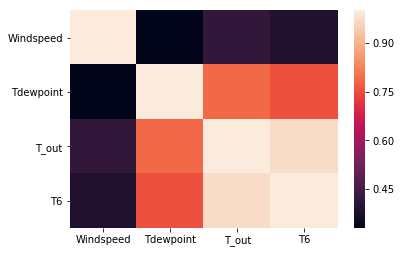

In [11]:
sns.heatmap(df.corr())

In [12]:
df.describe()

,Windspeed,Tdewpoint,T_out,T6
count,15000.000000,15000.000000,15000.000000,15000.000000
mean,4.299733,2.761777,5.904323,6.177747
std,2.589470,3.577249,4.189812,4.731747
min,0.000000,-6.600000,-5.000000,-6.065000
25%,2.000000,0.366667,2.983333,2.900000
50%,4.000000,2.833333,5.850000,6.090000
75%,6.000000,5.300000,8.966667,9.463333
max,14.000000,11.400000,19.700000,21.290000


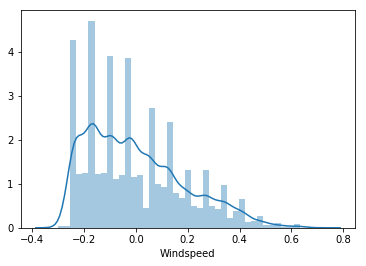

In [21]:
sns.distplot(df['Windspeed'])

### Preprocessing of Data: 

##### It can be observed that there are some zero values in the windspeed. We'll try to normalize the data using min max normalization and observe the windspeed data. 

In [22]:
df.Windspeed.replace({0:df['Windspeed'].median()}, inplace=True)

df.Windspeed.min()

df_norm = (df - df.mean()) / (df.max() - df.min())
df=df_norm
df.head()

,Windspeed,Tdewpoint,T_out,T6
0,0.195104,0.141012,0.028165,0.031033
1,0.171007,0.135457,0.023442,0.023966
2,0.146911,0.129901,0.018718,0.013974
3,0.122814,0.124346,0.013995,0.009343
4,0.098718,0.118790,0.009272,0.006906


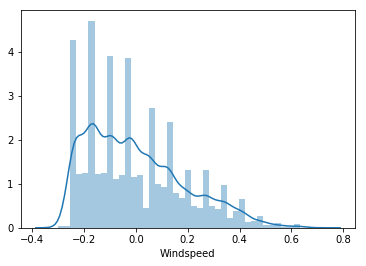

In [23]:
sns.distplot(df['Windspeed'])



### After min max normalization the windspeed attribute has no field with zero value

In [24]:
data2 = [go.Histogram(x=df['T_out'],
                     histnorm='probability')]

mypy.iplot(data2, filename='normalized histogram')



/anaconda3/lib/python3.7/site-packages/IPython/core/display.py:689: UserWarning:

Consider using IPython.display.IFrame instead



In [25]:
trace5 = go.Histogram(
    x=df1['T_out'],
    opacity=0.75
)
trace6 = go.Histogram(
    x=df1['Tdewpoint'],
    opacity=0.75
)

data5 = [trace5, trace6]
layout3 = go.Layout(barmode='overlay')
fig = go.Figure(data=data5, layout=layout3)

mypy.iplot(fig, filename='overlaid histogram')

/anaconda3/lib/python3.7/site-packages/IPython/core/display.py:689: UserWarning:

Consider using IPython.display.IFrame instead



In [26]:
trace11 = go.Scatter(x=df1['T1'], y=df1['RH_1'])
trace12 = go.Scatter(x=df1['T2'], y=df1['RH_2'])
trace13 = go.Scatter(x=df1['T3'], y=df1['RH_3'])
trace21 = go.Scatter(x=df1['T4'], y=df1['RH_4'])
trace22 = go.Scatter(x=df1['T5'], y=df1['RH_5'])
trace23 = go.Scatter(x=df1['T6'], y=df1['RH_6'])
trace31 = go.Scatter(x=df1['T7'], y=df1['RH_7'])
trace32 = go.Scatter(x=df1['T8'], y=df1['RH_8'])
trace33 = go.Scatter(x=df1['T9'], y=df1['RH_9'])

fig11 = tools.make_subplots(rows=3, cols=3, subplot_titles=('T1 vs RH_1', 'T2 vs RH_2', 'T3 vs RH_3', 
                                                          'T4 vs RH_4', 'T5 vs RH_5', 'T6 vs RH_6',
                                                        'T7 vs RH_7', 'T8 vs RH_8', 'T9 vs RH_9'))

fig11.append_trace(trace11, 1, 1)
fig11.append_trace(trace12, 1, 2)
fig11.append_trace(trace13, 1, 3)
fig11.append_trace(trace21, 2, 1)
fig11.append_trace(trace22, 2, 2)
fig11.append_trace(trace23, 2, 3)
fig11.append_trace(trace31, 3, 1)
fig11.append_trace(trace32, 3, 2)
fig11.append_trace(trace33, 3, 3)


fig11['layout'].update(height=900, width=900, title='Temperature vs Pressure of each room')
                            
mypy.iplot(fig11)



##This has all the subplots for T1vsRH_1,t2 and so on T=temperature, RH=humidity

This is the format of your plot grid:
[ (1,1) x1,y1 ]  [ (1,2) x2,y2 ]  [ (1,3) x3,y3 ]
[ (2,1) x4,y4 ]  [ (2,2) x5,y5 ]  [ (2,3) x6,y6 ]
[ (3,1) x7,y7 ]  [ (3,2) x8,y8 ]  [ (3,3) x9,y9 ]

The draw time for this plot will be slow for all clients.


/anaconda3/lib/python3.7/site-packages/plotly/api/v1/clientresp.py:40: UserWarning:

Estimated Draw Time Too Long

/anaconda3/lib/python3.7/site-packages/IPython/core/display.py:689: UserWarning:

Consider using IPython.display.IFrame instead



## Preliminary observation

In this dataset, I've observed that : 


T_out i.e temperature outside the house has maximum correlation with Tdewpoint and other temperatures in different rooms T1, T2, T3 ... T9. Windspeed also had some kind of correlation. 

Also, on the above graph it can be observed that there's some kind of dependency between each room's temperature and the percentage of humidity in that particular room. The graphs plotted are between T1 vs RH_1, T2 vs RH_2, ... T9 vs RH_9. There's another significant attribute that is the windspeed. On observing the windspeed attribute carefully, I came to the conclusion that some of the values were missing so I used min max scaling to normalize my data. I observed windspeed by plotting a histogram and looking that the minimum value was 0.0.

After normalization, another histogram was plotted. It can be observed from the histogram that there's no such zero values for the windspeed anymore. It means that our normalization worked successfully. I also realized that temperature is widely spread and can be used to predict based on these features. 

From the histogram above this graph, it can be observed that how temperature and Tdewpoint are widely spread across yet have some kind of linear dependency in them. I used hit and trial to plot various graph and check how they are dependent on each by plotting the same graph i.e temperature against various attributes. I came to conclusion that Tdewpoint is more widely spread across as is temperaute. 

In [27]:
X = np.array(df[['T6', 'Tdewpoint', 'Windspeed']])


T = np.array(df[['T_out']])

# Method

The *LinearModel* class is inherited by two classes *LinearRegress* and *LMS*. The *LinearRegress* class is for Least Squares. I have used the *solve* function in the numpy library to calculate the weights inside the *train* method of the class. The *use* function returns the dot product of the weight and the input data.


In the *LMS* class, there are three functions *train*, *train_step* and *use*. The *use* function for *LMS* class is similar to that of the *LinearRegress* class. The *train* function calls the *train_step* function to update the weights. The *train_step* takes one instance and the corresponding target value as an input. The following equation is used to update the weights in the *train_step* function.


The *train* function calls the *train_step* function for all the instances in the input data. Thus, the weight values are obtained in LMS.


\begin{align*}
  f(x;w) &= w^Tx = \sum_0^D w_i x_i \\
     &= w_0 x_0 + w_1 x_1 + \cdots + w_D x_D
\end{align*}

## Partition function

This function will divide the data into test and train and return

In [28]:

""" partitioning data

    parameters
    -----------
    X        pd.DataFrame
             input data to partition
    T        pd.DataFrame
             target labels to partition
    raito    list
             list of ratios for partitions (should be summed to 1) 
             the number of return pairs are different
"""
def partition(X, T, ratio=[0.8, 0.2]): 
    
    assert(np.sum(ratio) == 1)
    
    # shuffle the data indices 
    idxs = np.random.permutation(X.index)
    
    # the number of samples 
    N = X.shape[0]
    
    Xs = []
    Ts = []
    i = 0  # first index to zero
    for k, r in enumerate(ratio):
        nrows = int(round(N * r))  # number of rows
        
        if k == len(ratio) -1:
            Xs.append(X.iloc[i:, :])
            Ts.append(T.iloc[i:, :])
        else:
            Xs.append(X.iloc[i:i+nrows, :])
            Ts.append(T.iloc[i:i+nrows, :])
        
        i += nrows
    
    return Xs, Ts

In [29]:
Xlst, Tlst = partition(pd.DataFrame(X), pd.DataFrame(T))

In [30]:
Xtrain, Xtest = [xx.as_matrix() for xx in Xlst]
Ttrain, Ttest = [tt.as_matrix() for tt in Tlst]

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning:

Method .as_matrix will be removed in a future version. Use .values instead.

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning:

Method .as_matrix will be removed in a future version. Use .values instead.



In [31]:
df=df.dropna()

In [32]:
import numpy as np 
from abc import ABC, abstractmethod

# Super class for machine  models 

class BaseModel(ABC):
    """ Super class for ITCS Machine Learning Class"""
    
    @abstractmethod
    def train(self, X, T):
        pass

    @abstractmethod
    def use(self, X):
        pass

    
class LinearModel(BaseModel):
    """
        Abstract class for a linear model 
        
        Attributes
        ==========
        w       ndarray
                weight vector/matrix
    """

    def __init__(self):
        """
            weight vector w is initialized as None
        """
        self.w = None



    # check if the matrix is 2-dimensional. if not, raise an exception    
    def _check_matrix(self, mat, name):
        if len(mat.shape) != 2:
            raise ValueError(''.join(["Wrong matrix ", name]))
        
    # add a basis
    def add_ones(self, X):
        """
            add a column basis to X input matrix
        """
        self._check_matrix(X, 'X')
        return np.hstack((np.ones((X.shape[0], 1)), X))

    ####################################################
    #### abstract funcitons ############################
    @abstractmethod
    def train(self, X, T):
        """
            train linear model
            
            parameters
            -----------
            X     2d array
                  input data
            T     2d array
                  target labels
        """        
        pass
    
    @abstractmethod
    def use(self, X):
        """
            apply the learned model to input X
            
            parameters
            ----------
            X     2d array
                  input data
            
        """        
        pass 

### Least Squares

The parameter that gives best fit will be

$$ wv^* = \arg\min_wv \sum_{i=1}^{N} \Big( f(xv_i; wv) - t_i \Big)^2 $$



In this model, I have implemented the train and use function with the help of np.linalg.lstsq method of numpy library. 

In [33]:
# Linear Regression Class for least squares
class LinearRegress(LinearModel): 
    """ 
        LinearRegress class 
        
        attributes
        ===========
        w    nd.array  (column vector/matrix)
             weights
    """
    def __init__(self):
        LinearModel.__init__(self)
        
    def train(self, X, T):
        X = self.add_ones(X)
        self.w = np.linalg.lstsq(X.T @ X, X.T @ T, rcond=-1)[0]
        
    def use(self, X):
        X = self.add_ones(X)
        return X @ self.w


## Least Mean Squares

$$
 wv^{(k+1)} = wv^{(k)} - \alpha \Big( {wv^{(k)}}^\top xv_k - t_k \Big) xv_k.
 $$
 
 
 In this model, I've implemented train, train_step and use method. I've used train_step for a particular step function of train. 

In [34]:
import collections # for checking iterable instance

# LMS class 
class LMS(LinearModel):
    """
        Lease Mean Squares. online learning algorithm
    
        attributes
        ==========
        w        nd.array
                 weight matrix
        alpha    float
                 learning rate
    """
    def __init__(self, alpha):
        LinearModel.__init__(self)
        self.alpha = alpha
        
    # batch training by using train_step function
    def train(self, X, T):  
            for x, t in zip(X, T):
                self.train_step(x,t)

            
    # train LMS model one step 
    # here the x is 1d vector
    def train_step(self, x, t):
        if len(x.T.shape) != 2:
            x = np.insert(x,0,1).reshape(-1,1)
        if self.w is None:
            self.w = np.zeros((x.shape[0],1))
        
        
        m=t.size
        h = self.w.T @ x
        h=h-t
        self.w =self.w - (self.alpha * h * x)



        #if len(X.T.shape) != 2:
            #x = np.insert(x,0,1).reshape(-1,1)
            
        #x = self.add_ones(X).T
        #y = self.w.T @ x
        
        
        
        
        
        

        
    def use(self, X):
        if len(X.T.shape) != 2:
            x = np.insert(x,0,1).reshape(-1,1)

        x = self.add_ones(X).T
        y = self.w.T @ x
        
        return y.T  
    

In [35]:
import matplotlib.pyplot as plt
%matplotlib inline

In [36]:

##################### WHAT I WILL RELEASE ############

# Self-Test code for accuracy of your model - DO NOT MODIFY THIS
# Primilnary test data
X = np.array([[2,5],
              [6,2],
              [1,9],
              [4,5],
              [6,3],
              [7,4],
              [8,3]])
T = X[:,0, None] * 3 - 2 * X[:, 1, None] + 3
N = X.shape[0]

def rmse(T, Y):
    return np.sqrt(np.sum((T-Y)**2))

model_names = ['LS', 'LMS_All', 'LMS_1STEP']
models = [LinearRegress(), LMS(0.02), LMS(0.02)]
#train
for i, model in enumerate(models):
    print("training ", model_names[i], "...") 
    if i == len(models) -1: 
        # train only one step for LMS2
        model.train_step(X[0], T[0])
    else:
        model.train(X, T)


def check(a, b, eps=np.finfo(float).eps):
    if abs(a-b) > eps:
        print("failed.", a, b)
    else:
        print("passed.")

#print(T.shape)        
        
errors = [1.19e-13, 2.8753214702, 38.0584918251]
for i, model in enumerate(models):
    print("---- Testing ", model_names[i], "...", end=" ") 
    
    # rmse test
    err = rmse(T, model.use(X))
    if check(err, errors[i], eps=1e-10):
        print ("check your weights: ", model.w)
        print ("oracle: ", )
        

training  LS ...
training  LMS_All ...
training  LMS_1STEP ...
---- Testing  LS ... passed.
---- Testing  LMS_All ... passed.
---- Testing  LMS_1STEP ... passed.


## Experiments


#### Error (Cost) Function
 
 When we define $wv \in R^D$, the choice of $D$ real numbers can result in the best result. 
 Here, the word "*best*" can be vague. Thus, we need to define what *best* means. 
 The sum of square error function defines as follows:
 
 $$
 E(wv) = sum_{i=1}^N Big( f(xv_i; wv_i) - t_i Big)^2
 $$
 
 
This error function is the sum of Euclidean distances between the target values and the model outputs. This is to be minimized. The weights obtained are such that the value of the error function is minimum. The following two are the algorithms used to find the weights which minimize the error function.


### Least squares

The optimum weights satisfy the following condition

$$
wv^* = \arg\min_wv \sum_{i=1}{N} \Big( f(xv_i; wv) - t_i \Big)^2
$$

The derivative of this function is calculated and equated to zero to find the condition for minima.


### Least Mean Squares

The least mean squares is an online learning methods in which the weights are updated for each new instance which enters the training data. The error is calculated after every instance and the weights are updated in such a way that the error function is smaller for the next iteration than the previous iteration.

$$
wv^{(k+1)} = wv^{(k)} - \alpha \nabla E_k 
$$

$$
wv^{(k+1)} = wv^{(k)} - \alpha \Big( {wv^{(k)}}^\top xv_k - t_k \Big) xv_k.
$$

Here I have used LinearRegress object and called train function and passed the training data to the function. Later, I used use function and passed my Xtest as parameter to this function which was used to plot the scatter graph

Weights after LS: [[-0.00132103]
 [ 0.86486512]
 [ 0.09165035]
 [ 0.04106791]]


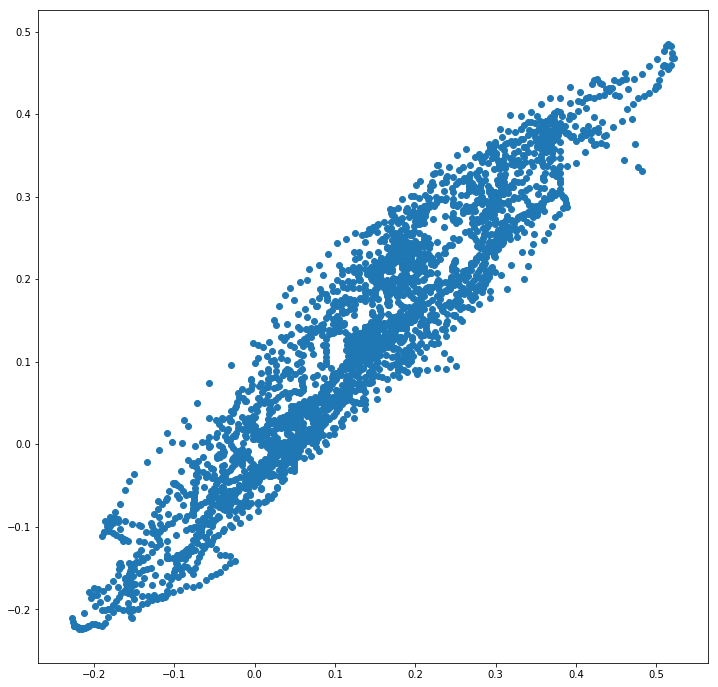

In [37]:
plt.rcParams['figure.figsize'] = [12, 12]



ls = LinearRegress()




ls.train(Xtrain, Ttrain)
#print(ls.w)
#print(X)
y = ls.use(Xtest)
#print(y)
#plt.plot(X, ls.use(X))
#plt.plot(X, T)
#plt.plot(ls.use(X))

plt.scatter(Ttest,ls.use(Xtest))
print('Weights after LS: {0}'.format(ls.w))

### The following is a plot of obtained target values and the known target values. The plot is very close to the plot of the line (y = x). This implies that the temperature is linearly dependent on the selected input values.

Weights after LMS_1STEP: [[0.07621333]
 [0.17607299]
 [0.17312395]
 [0.09913909]]


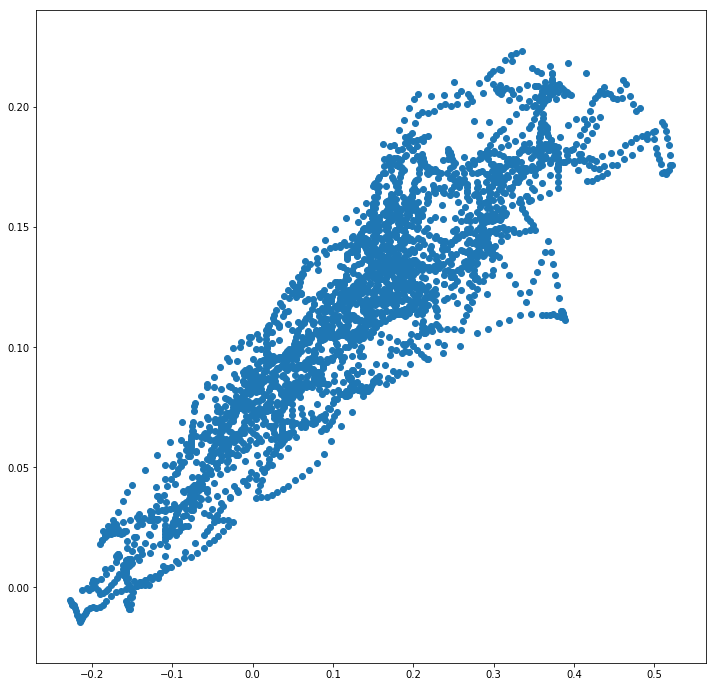

In [41]:
#Plot of Target value and the Attribute value in the dataset

lms = LMS(0.001)

#flag=0
for x, t in zip(Xtrain, Ttrain):
    lms.train_step(x, t)
       


#plt.plot(lms.use(X))
#plt.show(T, lms.use(X))
#plt.scatter(T,lms.use(X))
#plt.scatter(Ttest, lms.use(Xtest))

plt.scatter(Ttest, lms.use(Xtest)) 


print('Weights after LMS_1STEP: {0}'.format(lms.w))

The weight values for LMS_all: [[0.00114535]
 [0.8771025 ]
 [0.08604344]
 [0.03095785]]


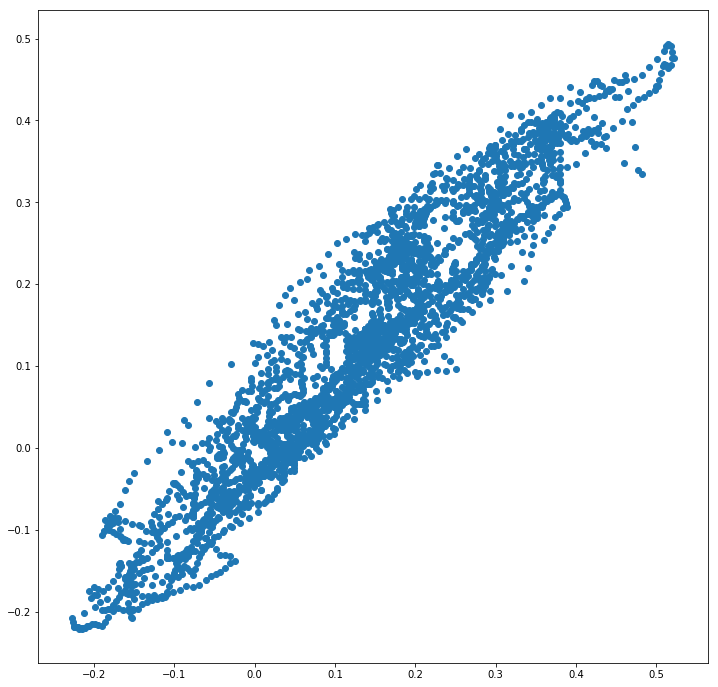

In [43]:
#flag=1
for i in range(100):
    for x, t in zip(Xtrain, Ttrain):
        lms.train_step(x, t)
plt.scatter(Ttest, lms.use(Xtest))
print('The weight values for LMS_all: {0}'.format(lms.w))

##### Analysis and observation of the algorithms

The difference between the 2 algorithms used was that the least squares algorithms is a batch learning method and the other is online learning method. The least squares method can be more accurate but is computationally expensive. Calculating the inverse of the matrix is required. Sometimes the matrix can also be singular i.e. non-invertible. The weights are calculated in one step by satisfying the condition of minima.

The least mean squares method is an online learning method. The weights are updated as new instances are added to the input data. The                                                                                                                                                                                                 
Weights after LS: <br>[[-0.00132103] <br>
 [ 0.86486512] <br>
 [ 0.09165035] <br>
 [ 0.04106791]]<br>

Weights after LMS_1STEP:<br> [[0.07621333]<br>
 [0.17607299]<br>
 [0.17312395]<br>
 [0.09913909]]<br>

The weight values for LMS_all:<br> [[0.06105104]<br>
 [0.4580235 ]<br>
 [0.36037171]<br>
 [0.27181871]]<br>


It can be seen that there's difference between the weights obtained from LS and that of the weights obtained  from LMS. The LMS_1step and LMS_all weights are somewhat similar. 
Computation time required for LS: 5 seconds
Computation time required for LMS_ALL: 4-5 minutes

## Conclusion

The challenges in this task was to understand the algorithms and to work with the dataset to pass all the tests that were given. In this assignment, I have learned to implement linear regression and to work and understant  the dataset more efficiently. I have learned that Prepocessing of dataset is really important for working with any dataset. 

## References

Professor's Notebook : https://nbviewer.jupyter.org/url/webpages.uncc.edu/mlee173/teach/itcs6156/notebooks/notes/Note-Linear%20Model.ipynb

Wikipedia: https://en.wikipedia.org/wiki/Linear_regression

https://archive.ics.uci.edu/ml/datasets/Appliances+energy+prediction

## Extra Credit

The most and least significant attribute in my dataset are: 

In [ ]:
df1.corr()

The least significant attributes are rv1 and rv2. Those are random variable 1 and random variable 2. They have nothing to do with the prediction of any of the attribute. They both are independent and randomly generated attributes. They have like negative correlation with each and every attribute except themselves.  

The most significant feature is Tdewpoint